In [1]:
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity


In [27]:
!pip3 install plotly


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [29]:
!pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [30]:

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='solar')

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data_weed.csv')
data.head()

,Unnamed: 0,name,type,EFA,thc_input,cbd_input
0,0,100 OG,Hybrid,"Focused, Citrus, Depression",127.000000,16.0
1,1,A-10,Indica,"Relaxed, Happy, Uplifted, Energetic, Sleepy, D...",858.444444,13.0
2,2,Acapulco Gold,Sativa,"Happy, Euphoric, Uplifted, Relaxed, Creative, ...",924.312500,30.0
3,3,Afghani Bullrider,Hybrid,"Uplifted, Relaxed, Happy, Euphoric, Dry Mouth,...",127.000000,16.0
4,4,Afghan Big Bud,Indica,"Euphoric, Happy, Talkative, Relaxed, Sleepy, D...",858.444444,13.0


In [4]:
data = data.rename(columns={'Unnamed: 0': 'id strain'})

In [5]:
data.shape


(942, 6)

In [6]:

def print_description(index):
    example = data[data.index == index][['EFA', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print_description(10)

Energetic, Uplifted, Happy, Creative, Focused, Dry Mouth, Anxious, Sweet, Citrus, Depression, Stress, Pain
Name: Aloha


In [10]:
print_description(900)

Relaxed, Happy, Sleepy, Tingly, Dry Mouth, Citrus, Sweet, Muscle Spasms, Stress, Pain, Inflammation, Insomnia
Name: Sweet Baby Jane


In [12]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [23]:
common_words = get_top_n_words(data['EFA'])
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.T


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
desc,stress,happy,dry,mouth,pain,depression,relaxed,euphoric,uplifted,earthy,...,pineapple,strawberry,lavender,honey,coffee,rose,vanilla,seizures,mint,apple
count,836,812,803,803,754,753,720,700,593,509,...,17,17,14,13,12,10,8,7,6,1


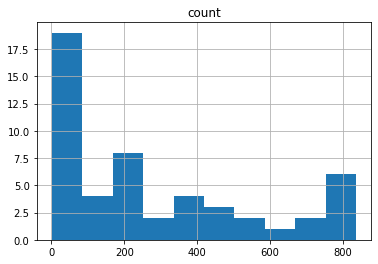

In [24]:
hist = df1.hist()

In [31]:

data['word_count'] = data['EFA'].apply(lambda x: len(str(x).split()))

In [32]:
desc_lengths = list(data['word_count'])

print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 942 
Average word count 14.501061571125266 
Minimum word count 3 
Maximum word count 20


In [33]:
data.set_index('name', inplace = True)

In [38]:
data=data.drop(columns=['id strain'])
data

,type,EFA,thc_input,cbd_input,word_count
name,,,,,
100 OG,Hybrid,"Focused, Citrus, Depression",127.000000,16.0,3
A-10,Indica,"Relaxed, Happy, Uplifted, Energetic, Sleepy, D...",858.444444,13.0,16
Acapulco Gold,Sativa,"Happy, Euphoric, Uplifted, Relaxed, Creative, ...",924.312500,30.0,17
Afghani Bullrider,Hybrid,"Uplifted, Relaxed, Happy, Euphoric, Dry Mouth,...",127.000000,16.0,14
Afghan Big Bud,Indica,"Euphoric, Happy, Talkative, Relaxed, Sleepy, D...",858.444444,13.0,15
...,...,...,...,...,...
X-Wing,Indica,"Happy, Sleepy, Relaxed, Creative, Hungry, Dry ...",858.444444,13.0,16
XXX 420,Indica,"Relaxed, Talkative, Happy, Uplifted, Energetic...",858.444444,13.0,17
XXX OG,Indica,"Sleepy, Relaxed, Happy, Euphoric, Uplifted, Dr...",858.444444,13.0,17


In [ ]:
#nlp=English()
#tokenizer = Tokenizer(nlp.vocab)

In [39]:
tf = TfidfVectorizer(analyzer='word', stop_words='english')

In [40]:
matrix1 = tf.fit_transform(data['EFA'])
cosine_similarities = linear_kernel(matrix1, matrix1)

In [41]:

indices = pd.Series(data.index)

In [42]:
indices[:50]

0                     100 OG
1                       A-10
2              Acapulco Gold
3          Afghani Bullrider
4             Afghan Big Bud
5                    Afghani
6                   Afghooey
7                      Afgoo
8                    Afgooey
9       Alaskan Thunder Fuck
10                     Aloha
11              Amnesia Haze
12                Anesthesia
13            BC Sweet Tooth
14                  Berkeley
15               Berry White
16                   Big Bud
17                 Big Wreck
18              Black Domina
19          Black Label Kush
20      Blackberry Hashplant
21           Blackberry Kush
22                Blue Bayou
23               Blue Cheese
24               Blue Mystic
25            Blue Satellite
26                 Blueberry
27            Blueberry Kush
28           Brainstorm Haze
29                Bubba Kush
30                  Bubba OG
31                  C13 Haze
32            Cannalope Haze
33               Casey Jones
34            

In [43]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_weed = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_weed